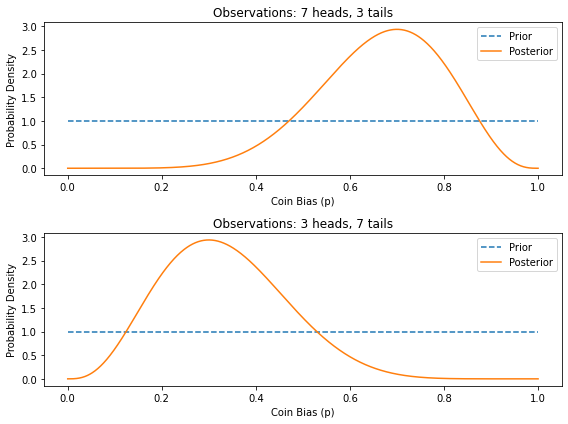

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the prior Beta distribution
alpha_prior = 1  # Prior success (heads)
beta_prior = 1   # Prior failure (tails)

# Define the number of coin flips and observed outcomes
num_flips = 10
observed_data = [7, 3]  # Number of heads and tails observed

# Create a range of possible bias values (p) for the coin
bias_values = np.linspace(0, 1, 1000)

# Create subplots for different observed data outcomes
fig, axs = plt.subplots(len(observed_data), 1, figsize=(8, 6))

for i, observed_heads in enumerate(observed_data):
    # Update the posterior distribution using Bayes' theorem
    alpha_posterior = alpha_prior + observed_heads
    beta_posterior = beta_prior + (num_flips - observed_heads)

    # Calculate the posterior distribution using the Beta distribution
    posterior = beta(alpha_posterior, beta_posterior).pdf(bias_values)

    # Plot the prior and posterior distributions
    axs[i].plot(bias_values, beta(alpha_prior, beta_prior).pdf(bias_values), label='Prior', linestyle='--')
    axs[i].plot(bias_values, posterior, label='Posterior')
    axs[i].set_title(f'Observations: {observed_heads} heads, {num_flips - observed_heads} tails')
    axs[i].set_xlabel('Coin Bias (p)')
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()

plt.tight_layout()
plt.show()

[[1 0 1]
 [0 1 0]
 [0 0 0]]
1
2
3
2
4
6
3
6
9


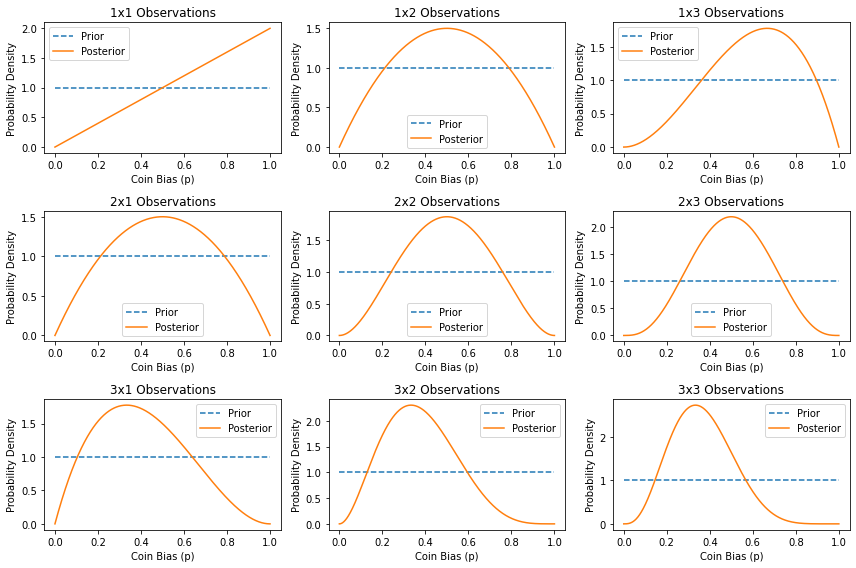

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the prior Beta distribution
alpha_prior = 1  # Prior success (heads)
beta_prior = 1   # Prior failure (tails)

# Create a range of possible bias values (p) for the coin
bias_values = np.linspace(0, 1, 1000)

# Create a list of random outcomes (0 for tails, 1 for heads)

random_outcomes = np.random.choice([0, 1], size=(3, 3))  # Example: 3x3 matrix of random outcomes
print(random_outcomes)
# Create subplots for different data points
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

for i in range(3):
    for j in range(3):
        # Extract the observed data for this iteration
        observed_data = random_outcomes[:i + 1, :j + 1]

        # Compute the number of heads and tails in the observed data
        observed_heads = np.sum(observed_data)
        num_flips = observed_data.size
        print(num_flips)

        # Update the posterior distribution using Bayes' theorem
        alpha_posterior = alpha_prior + observed_heads
        beta_posterior = beta_prior + (num_flips - observed_heads)

        # Calculate the posterior distribution using the Beta distribution
        posterior = beta(alpha_posterior, beta_posterior).pdf(bias_values)

        # Plot the prior and posterior distributions
        axs[i, j].plot(bias_values, beta(alpha_prior, beta_prior).pdf(bias_values), label='Prior', linestyle='--')
        axs[i, j].plot(bias_values, posterior, label='Posterior')
        axs[i, j].set_title(f'{i + 1}x{j + 1} Observations')
        axs[i, j].set_xlabel('Coin Bias (p)')
        axs[i, j].set_ylabel('Probability Density')
        axs[i, j].legend()

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import binom


# Parameters for the prior distribution (uniform distribution)

def bayesian_inference(N=5000,n=20,center_val=0.5):

    #N=5000 # dimension  
    prior = np.ones(N)
    prior/=len(prior)  # Initial uniform prior
    bias_values = np.linspace(0, 1, N)

    prior_0=prior

    # Create subplots for different data points

    # Initialize counters

    # number of samples
   # n=20
    nj=3
    ni=3
    fig, axs = plt.subplots(ni, nj, figsize=(15, 8))
   # center_val=0.8
    max_y_lim=0
    count_=0


    posterior_mean_arry=[np.sum(bias_values * prior_0) / np.sum(prior_0)]
    posterior_variance_arry=[0.0]
    for i in range(0,ni):
        for j in range(0,nj):
            observed_heads = 0
            observed_tails = 0
            # Draw 10 random samples from a uniform distribution
            samples = np.random.uniform(0, 1, n)+(center_val-0.5)
            count_+=n
            # Count the number of heads and tails in the samples
            observed_heads += np.sum(samples >= 0.5)
            observed_tails += n - observed_heads

            # Calculate the likelihood function (probability of observing data given bias)
            likelihood = binom.pmf(observed_heads, n, bias_values) # comb(n, observed_heads) *(bias_values ** observed_heads) * ((1 - bias_values) ** observed_tails)

            # Update the posterior distribution by multiplying the prior and likelihood
            posterior = prior * likelihood
            posterior /= np.sum(posterior)  # Normalize to make it a proper probability distribution

            posterior_mean = np.sum(bias_values * posterior) / np.sum(posterior)
            posterior_variance=(np.sum(posterior*(bias_values-posterior_mean)**2))/( np.sum(posterior))
 
            posterior_mean_arry.append(posterior_mean)
            posterior_variance_arry.append(posterior_variance)
            # Plot the prior and posterior distributions
            axs[i, j].plot(bias_values, prior, label='Prior', color='tab:blue', linestyle='--')
            axs[i, j].plot(bias_values, prior_0, label='Init',color='black', linestyle='--')
            axs[i, j].axvline(x=posterior_mean, color='tab:red', linestyle='--', label='Posterior Mean')

            axs[i, j].plot(bias_values, posterior, color='tab:orange', label='Posterior')
            axs[i, j].set_title(f'{count_} Samples')
            axs[i, j].set_xlabel('Coin Bias (p)')
            axs[i, j].set_ylabel('Probability Density')
            axs[i, j].legend()

            # Update the prior for the next iteration
            prior = posterior
            max_y_lim=max(max_y_lim,posterior.max())

    for i in range(0,ni):
        for j in range(0,nj):
            axs[i, j].set_ylim(-0.00001,max_y_lim*(1.1))


    plt.tight_layout()
    plt.show()

    sample_size = n*np.arange(len(posterior_mean_arry))
    upper_bound = np.array(posterior_mean_arry) + np.sqrt(np.array(posterior_variance_arry))
    lower_bound = np.array(posterior_mean_arry) - np.sqrt(np.array(posterior_variance_arry))

    # Plot the posterior mean array
    plt.axhline(y=center_val, color='black', linestyle='--', label=f'True: {center_val}')

    plt.plot(sample_size, posterior_mean_arry, color='tab:red',label='Posterior Mean', marker='o', linestyle='-')
    plt.fill_between(sample_size, lower_bound, upper_bound, color='tab:green', alpha=0.3, label='Variance')

    # Set labels and title
    plt.xlabel('Sample Size')
    plt.ylabel('Posterior Mean')
    plt.title('Posterior Mean convergence')
    plt.ylim(-0.00001,1)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


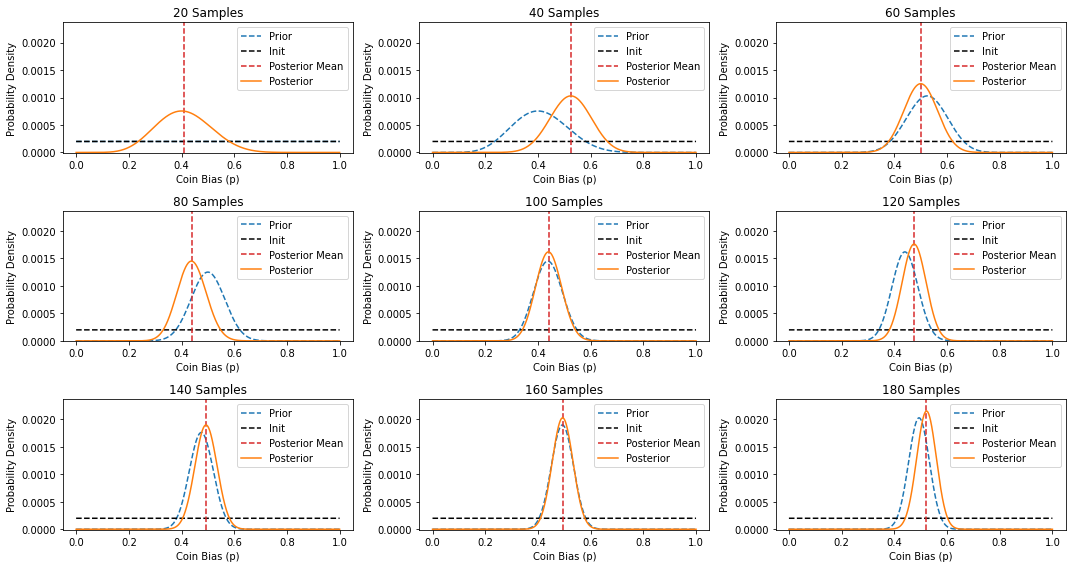

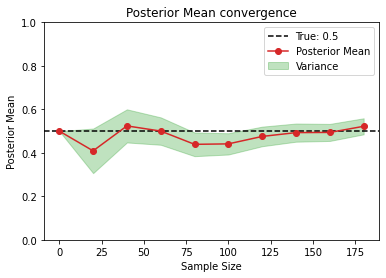

In [23]:
bayesian_inference(N=5000,n=20,center_val=0.5)

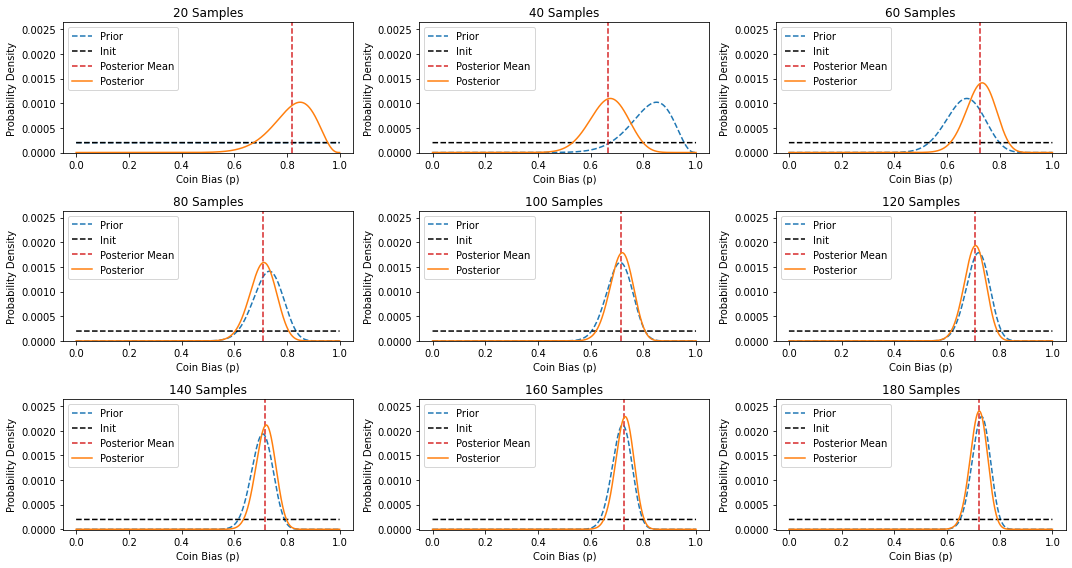

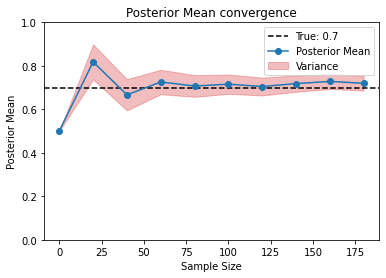

In [21]:
bayesian_inference(N=5000,n=20,center_val=0.7)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def frequentist_inference(N=5000, n=20, center_val=0.5):

    # N = 5000  # dimension
    bias_values = np.linspace(0, 1, N)
    

    # Create subplots for different data points
    nj = 3
    ni = 3
    fig, axs = plt.subplots(ni, nj, figsize=(15, 8))

    max_y_lim = 0
    count_ = 0
    mle_arry=[]
    true_mean_arry=[]
    count_arry=[]
    for i in range(ni):
        for j in range(nj):
            observed_heads = 0
            observed_tails = 0
            count_+=n
            count_arry.append(count_)
            samples = np.random.uniform(0, 1, count_)+(center_val-0.5)
            print(count_)
            # Count the number of heads and tails in the samples
            observed_heads += np.sum(samples >= 0.5)
            observed_tails += n - observed_heads
            true_mean=center_val*count_
            true_mean_arry.append(true_mean)
            
            # Calculate the likelihood function (probability of observing data given bias)
            likelihood = binom.pmf(observed_heads, count_, bias_values)

            # Find the maximum likelihood estimate for the bias
            mle_estimate = bias_values[np.argmax(likelihood)]
            mle_arry.append(mle_estimate)
            # Plot the likelihood function
            number_heads_arry=np.arange(count_)
            max_likelihood_fuc=binom.pmf(number_heads_arry, count_, mle_estimate)
            true_likelihood_fuc=binom.pmf(number_heads_arry, count_, center_val)

            axs[i, j].plot(number_heads_arry, max_likelihood_fuc, label='Max-Likelihood',  linestyle='--',color='tab:blue')
            axs[i, j].plot(number_heads_arry, true_likelihood_fuc, label='True-Likelihood', color='black')

            axs[i, j].axvline(x=observed_heads, color='tab:red', linestyle='--', label='observed value')
            #axs[i, j].hist(samples, bins=5, density=True, alpha=0.4, color='tab:purple', label='Sample Histogram')
            
            axs[i, j].set_title(f'{count_} Samples')
            axs[i, j].set_xlabel('Head counts ')
            axs[i, j].set_ylabel('Likelihood')
            axs[i, j].legend()
    plt.tight_layout()
    plt.show()

    # Plot the posterior mean array
    plt.axhline(y=center_val, color='black', linestyle='--', label=f'True: {center_val}')
    # calculate the "frequency"
    plt.plot(count_arry,np.array(mle_arry), color='tab:red',label='Observed Frequency', marker='o', linestyle='-')
    # Calculate the Fisher Information
    fisher_information = count_arry / (np.array(mle_arry) * (1 - np.array(mle_arry)))

    # Calculate the variance of the MLE estimate
    variance_mle = 1 / fisher_information
    
    upper_bound = np.array(mle_arry) + np.sqrt(variance_mle)
    lower_bound = np.array(mle_arry) - np.sqrt(variance_mle)

    plt.fill_between(count_arry, lower_bound, upper_bound, color='tab:green', alpha=0.3, label='Variance')

    # Set labels and title
    plt.xlabel('Sample Size')
    plt.ylabel('Frequency')
    plt.title('Frequency Mean convergence')
    plt.ylim(-0.00001,1)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()



20
40
60
80
100
120
140
160
180


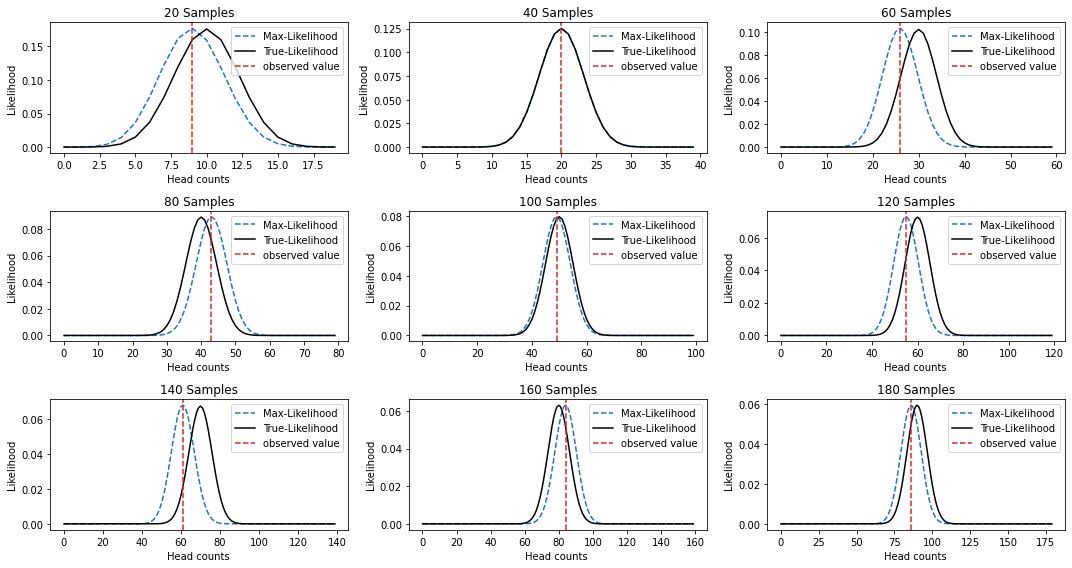

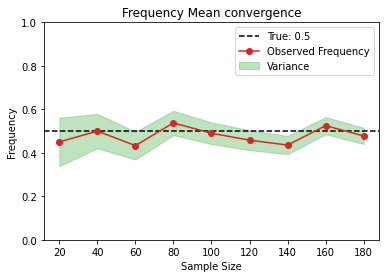

In [55]:
frequentist_inference(N=5000, n=20, center_val=0.5)

20
40
60
80
100
120
140
160
180


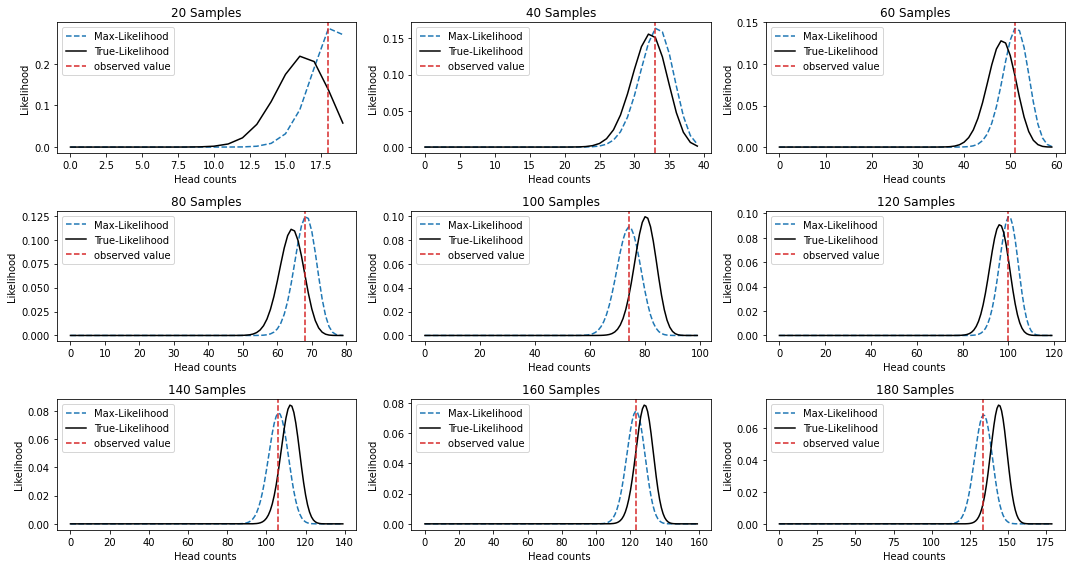

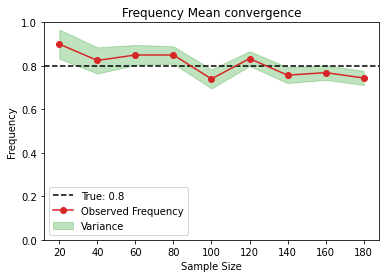

In [57]:
frequentist_inference(N=5000, n=20, center_val=0.8)

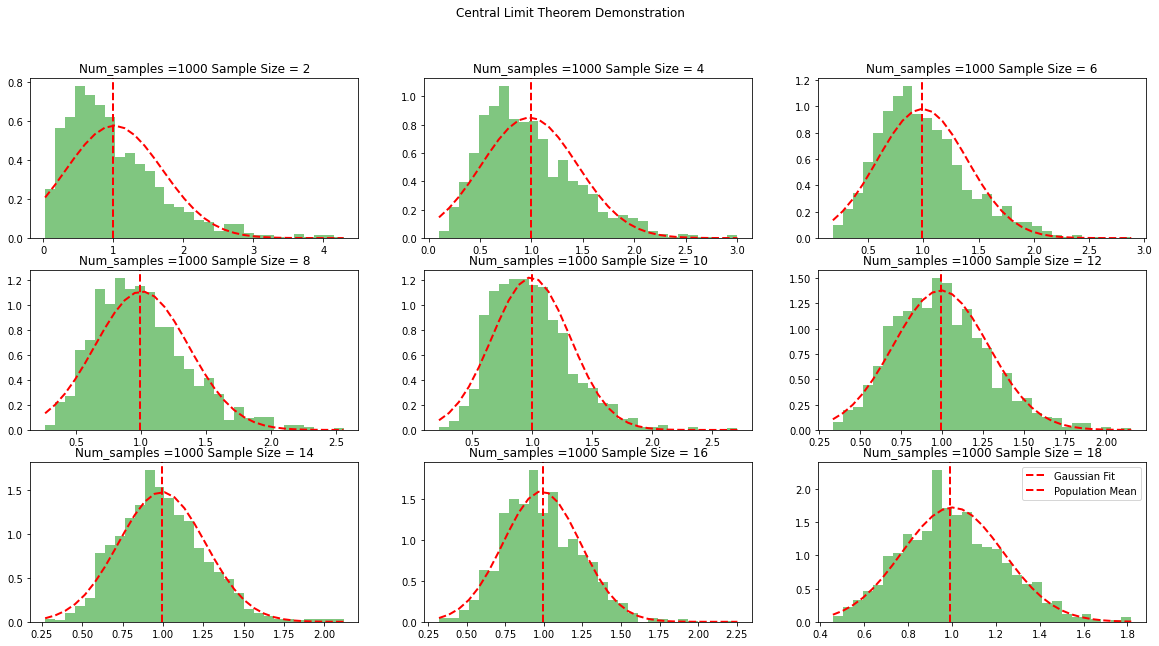

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

def central_limit_theorem(num_samples=1000, n=20, exp_scale=1):
    def gaussian_fit(x, mu, std):
        return norm.pdf(x, mu, std)
    # Population distribution (non-normal distribution)
    population = np.random.exponential(scale=exp_scale, size=10000)

    # Sample sizes for each experiment
    sample_sizes = n * (np.arange(9) + 1)

    # Create subplots for different data points
    nj = 3
    ni = 3
    fig, axs = plt.subplots(ni, nj, figsize=(20, 10))
    
    for i, sample_size in enumerate(sample_sizes):
        sample_means = []
        for _ in range(num_samples):
            # Randomly sample from the population
            sample = np.random.choice(population, size=sample_size)
            # Calculate the sample mean
            sample_mean = np.mean(sample)
            sample_means.append(sample_mean)
            
        mu, std = norm.fit(sample_means)

        # Plot a histogram of the sample means on the subplot
        n, bins, _ =axs[i // nj, i % nj].hist(sample_means, bins=30, density=True, alpha=0.6, color='tab:green')
        axs[i // nj, i % nj].set_title(f'Num_samples ={num_samples} Sample Size = {sample_size}')
        y = gaussian_fit(bins, mu, std)
        axs[i // nj, i % nj].plot(bins, y, 'r--', linewidth=2, label='Gaussian Fit')
 
        # Add a vertical line at the population mean (for comparison)
        population_mean = np.mean(population)
        axs[i // nj, i % nj].axvline(population_mean, color='r', linestyle='--', linewidth=2, label='Population Mean')

    # Add labels and legend
    plt.suptitle('Central Limit Theorem Demonstration')
    plt.legend()

    plt.show()

central_limit_theorem(num_samples=1000, n=2, exp_scale=1)